In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_chart_title(ticker: yf.Ticker, symbol: str, ctype: str) -> str:
    try:
        title = '%s (%s) - %s' % (ticker.info['longName'], symbol, ctype)
    except KeyError:
        title = '%s - %s' % (symbol, ctype)
    return title

In [3]:
def gen_chart(df: pd.DataFrame, title: str):
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        xrotation=0,
        ax=ax
    )
    ax.set_title(title)
    ax.grid()
    
    plt.tight_layout()
    plt.savefig('output.png')
    plt.show()

# Yahoo Finance から日足のデータを取得

In [4]:
symbol = '^N225'
ticker = yf.Ticker(symbol)
df0 = ticker.history(period='6mo', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-12 00:00:00+09:00,38865.148438,38945.988281,38809.359375,38876.710938,108200000,0.0,0.0
2024-06-13 00:00:00+09:00,39182.058594,39252.441406,38689.789062,38720.468750,115900000,0.0,0.0
2024-06-14 00:00:00+09:00,38587.570312,39025.699219,38554.750000,38814.558594,157100000,0.0,0.0
2024-06-17 00:00:00+09:00,38440.980469,38442.699219,37950.199219,38102.441406,107500000,0.0,0.0
2024-06-18 00:00:00+09:00,38433.480469,38519.019531,38332.890625,38482.109375,97100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-06 00:00:00+09:00,39371.558594,39468.468750,38940.441406,39091.171875,101500000,0.0,0.0
2024-12-09 00:00:00+09:00,39332.550781,39332.550781,38972.781250,39160.500000,113100000,0.0,0.0
2024-12-10 00:00:00+09:00,39375.488281,39465.140625,39171.691406,39367.578125,110300000,0.0,0.0


## 不要なデータを除去

In [5]:
df = df0[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
Date,,,,
2024-06-12 00:00:00+09:00,38865.148438,38945.988281,38809.359375,38876.710938
2024-06-13 00:00:00+09:00,39182.058594,39252.441406,38689.789062,38720.468750
2024-06-14 00:00:00+09:00,38587.570312,39025.699219,38554.750000,38814.558594
2024-06-17 00:00:00+09:00,38440.980469,38442.699219,37950.199219,38102.441406
2024-06-18 00:00:00+09:00,38433.480469,38519.019531,38332.890625,38482.109375
...,...,...,...,...
2024-12-06 00:00:00+09:00,39371.558594,39468.468750,38940.441406,39091.171875
2024-12-09 00:00:00+09:00,39332.550781,39332.550781,38972.781250,39160.500000
2024-12-10 00:00:00+09:00,39375.488281,39465.140625,39171.691406,39367.578125


# ローソク足のチャート

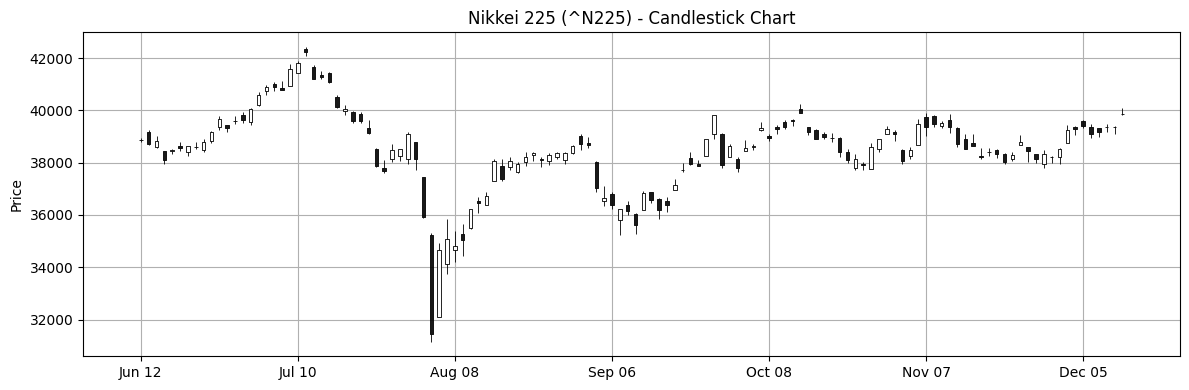

In [6]:
ctype = 'Candlestick Chart'
gen_chart(df, get_chart_title(ticker, symbol, ctype))

# 平均足のデータを作成

## ４本値データと同じインデックスと列を持った空のデータフレームを用意

In [7]:
df_mean = df.copy()
for col in df.columns:
    df_mean[col] = np.nan
df_mean

,Open,High,Low,Close
Date,,,,
2024-06-12 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-06-13 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-06-14 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-06-17 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-06-18 00:00:00+09:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-06 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-12-09 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-12-10 00:00:00+09:00,NaN,NaN,NaN,NaN


## 定義に従って一行ずつ平均足データを作成

In [8]:
"""
【参考・引用サイト】
https://marketspeed.jp/ms2/onlinehelp/ohm_007/ohm_007_05.html
"""
for i, dt in enumerate(df.index):
    # 1本目の平均足
    # 前日の平均足がなく始値が算出出来ないため、描画対象外
    if i == 0:
        continue

    # 【平均足の始値】
    if i == 1:
        # 2本目の平均足：前日の平均足がないため、始値を下記値より算出する
        # 始値=(前日の始値+前日の高値+前日の安値+前日の終値)/4
        p_open = df.iloc[0].mean()
    else:
        # 始値=(前日の平均足の始値+前日の平均足の終値)/2
        p_open = df_mean.iloc[i - 1][['Open', 'Close']].mean()

    # 【平均足の終値】
    # 終値=(当日の始値+当日の高値+当日の安値+当日の終値)/4
    p_close = df.iloc[i].mean()
    
    """
    陰線：始値＞＝終値
    陽線：始値＜終値
    平均足の高値と安値は、当日の高値と安値を用いる。但し、
    平均足が陰線で当日の高値＜平均足の始値の場合、平均足の高値=平均足の始値とする。
    平均足が陽線で当日の安値＞平均足の始値の場合、平均足の安値=平均足の始値とする。
    """
    # 【平均足の高値】
    if p_open >= p_close: # 平均足が陰線
        p_high = max(p_open, df.iloc[i]['High'])
    else:
        p_high = df.iloc[i]['High']
    # 【平均足の安値】
    if p_open < p_close: # 平均足が陽線
        p_low = min(p_open, df.iloc[i]['Low'])
    else:
        p_low = df.iloc[i]['Low']

    df_mean.iloc[i] = [p_open, p_high, p_low, p_close]
df_mean

,Open,High,Low,Close
Date,,,,
2024-06-12 00:00:00+09:00,NaN,NaN,NaN,NaN
2024-06-13 00:00:00+09:00,38874.301758,39252.441406,38689.789062,38961.189453
2024-06-14 00:00:00+09:00,38917.745605,39025.699219,38554.750000,38745.644531
2024-06-17 00:00:00+09:00,38831.695068,38831.695068,37950.199219,38234.080078
2024-06-18 00:00:00+09:00,38532.887573,38532.887573,38332.890625,38441.875000
...,...,...,...,...
2024-12-06 00:00:00+09:00,39226.921757,39468.468750,38940.441406,39217.910156
2024-12-09 00:00:00+09:00,39222.415957,39332.550781,38972.781250,39199.595703
2024-12-10 00:00:00+09:00,39211.005830,39465.140625,39171.691406,39344.974609


# 平均足チャート

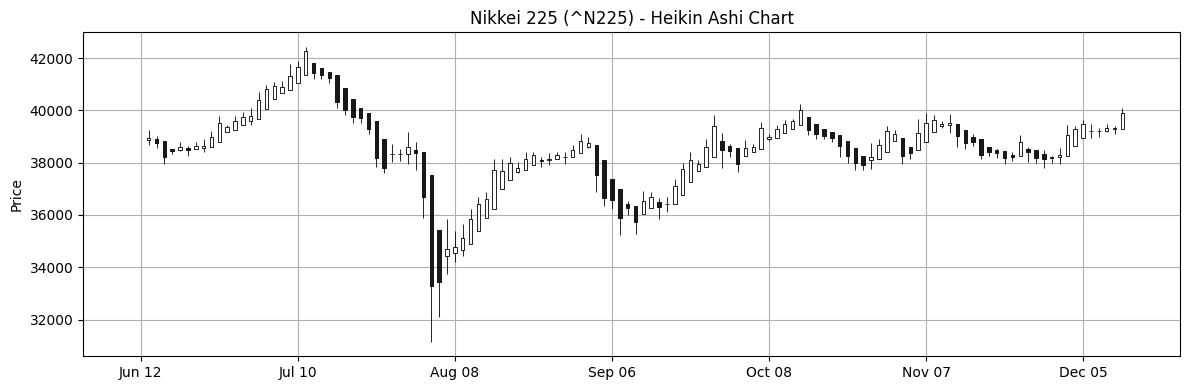

In [9]:
ctype = 'Heikin Ashi Chart'
gen_chart(df_mean, get_chart_title(ticker, symbol, ctype))